In [1]:
import pandas as pd

'car_number','行车里程','平均速度',   
 '急加速次数','急减速次数','急加速百分比','急减速百分比',   
 '熄火滑行次数','熄火滑行平均距离',   
'急转弯次数','急转弯平均值',   
'怠速预热次数','超长怠速次数',   
'疲劳驾驶次数','日累计疲劳驾驶次数'   

## 1. 平均速度得分

In [64]:
def mean_speed_score_cal(mean_speed):
    mean_speed_score = 0
    if mean_speed <= 35:
        mean_speed_score = 100
    elif mean_speed>35 and mean_speed<=45:
        mean_speed_score = 90
    elif mean_speed >45 and mean_speed<=60:
        mean_speed_score = 75
    elif mean_speed>60 and mean_speed<=80:
        mean_speed_score =50
    else:
        mean_speed_score = 20
    
    return mean_speed_score


## 2. 熄火滑行得分

In [65]:
def off_state_score_cal(off_state):
    off_state_score = 100
    if off_state == 1:
        off_state_score = 80
        
    elif off_state>=2 and off_state<=3:
        off_state_score = 70
        
    elif off_state >=4 and off_state<=5:
        off_state_score = 40
        
    elif off_state>=6:
        off_state_score =10

    
    return off_state_score

## 3. 怠速预热得分

In [66]:
def idle_score_cal(idle):
    idle_score = 100
    if idle >0 and idle<20:
        idle_score = 95
    elif idle>=20 and idle<50:
        idle_score = 85
    elif idle >=50 and idle<100:
        idle_score = 65
    elif idle>=100 and idle<150:
        idle_score =40
    elif idle >=150:
        idle_score = 20
    
    return idle_score

## 4. 超长怠速得分

In [67]:
def longidle_score_cal(longidle):
    longidle_score = 100
    if longidle == 1:
        longidle_score = 90
    elif longidle>=2 and longidle<=3:
        longidle_score = 80
    elif longidle >=4 and longidle<=5:
        longidle_score = 60
    elif longidle>=6 and longidle<=9:
        longidle_score =30
    elif longidle >=10:
        longidle_score = 10
    
    return longidle_score

## 5. 急加急减急转弯得分

In [74]:
# 急加速 急减速  同一套标准
def acc_up_score_cal(acc_up):
    acc_up_score = 100
    if acc_up >0 and acc_up <= 0.05:
        acc_up_score = 95
    elif acc_up>=0.05 and acc_up<0.1:
        acc_up_score = 85
    elif acc_up >=0.1 and acc_up<0.2:
        acc_up_score = 65
    elif acc_up>=0.2 and acc_up<0.3:
        acc_up_score =40
    elif acc_up >=0.3:
        acc_up_score = 20
    
    return acc_up_score
### 急转弯
def hush_rad_score_cal(hush_rad):
    hush_rad_score = 100
    
    if hush_rad == 1:
        hush_rad_score = 95
    elif hush_rad>=2 and hush_rad<=3:
        hush_rad_score = 85
    elif hush_rad >=4 and hush_rad<=5:
        hush_rad_score = 65
    elif hush_rad>=6 and hush_rad<=9:
        hush_rad_score =40
    elif hush_rad >=10:
        hush_rad_score = 20
    
    return hush_rad_score

## 6. 疲劳驾驶得分

In [69]:
def tired_score_cal(tired):
    tired_score = 100
    if tired == 1:
        tired_score = 80
    elif tired ==2 :
        tired_score = 50
    elif tired >=3 :
        tired_score = 10
    
    return tired_score

def tired_score_cal(very_tired):
    very_tired_score = 100
    if very_tired >=1 and very_tired <=2 :
        very_tired_score = 80
    elif very_tired >=3 and very_tired <=4 :
        very_tired_score = 60
    elif very_tired >=5 and very_tired <=8 :
        very_tired_score = 40
    elif very_tired >=9 :
        very_tired_score = 20
    
    return very_tired_score

# 汽车得分汇总计算

In [75]:

def score_evaluate(data):
    
        
    data['平均速度得分'] = data.apply(lambda row: mean_speed_score_cal(row['平均速度']),axis = 1)
    data['熄火滑行得分'] = data.apply(lambda row: off_state_score_cal(row['熄火滑行次数']),axis = 1)
    data['怠速预热得分'] = data.apply(lambda row: idle_score_cal(row['怠速预热次数']),axis = 1)
    data['超长怠速得分'] = data.apply(lambda row: longidle_score_cal(row['超长怠速次数']),axis = 1)
    data['急加速得分'] = data.apply(lambda row: acc_up_score_cal(row['急加速百分比']),axis = 1)
    data['急减速得分'] = data.apply(lambda row: acc_up_score_cal(row['急减速百分比']),axis = 1)
    data['急转弯得分'] = data.apply(lambda row: hush_rad_score_cal(row['急转弯次数']),axis = 1)
    data['疲劳驾驶得分'] = data.apply(lambda row: tired_score_cal(row['疲劳驾驶次数']),axis = 1)
    data['日累计疲劳驾驶得分'] = data.apply(lambda row: tired_score_cal(row['日累计疲劳驾驶次数']),axis = 1)
    
    
    return data
    
def score_sum(data):
    data['score'] = data.loc[:,'平均速度得分':'日累计疲劳驾驶得分'].apply(lambda x: x.sum(), axis=1)
    
    return data
    


In [76]:
data = pd.read_csv('450 cars evaluation result.csv', encoding='gb2312')

data = score_evaluate(data)
score_data = score_sum(data)


score_data.to_csv('450 cars evaluation score.csv', encoding='gb2312',index = False)

# 汽车指标可视化

In [82]:
import matplotlib.pyplot as plt
plt.rcParams[ 'font.sans-serif'] = [ 'Microsoft YaHei']
plt.rcParams[ 'axes.unicode_minus'] = False

## 1. 汽车得分条形图

Index(['car_number', '行车里程', '平均速度', '急加速次数', '急减速次数', '急加速百分比', '急减速百分比',
       '熄火滑行次数', '熄火滑行平均距离', '急转弯次数', '急转弯平均值', '怠速预热次数', '超长怠速次数', '疲劳驾驶次数',
       '日累计疲劳驾驶次数', '平均速度得分', '熄火滑行得分', '怠速预热得分', '超长怠速得分', '急加速得分', '急减速得分',
       '急转弯得分', '疲劳驾驶得分', '日累计疲劳驾驶得分', 'score'],
      dtype='object')


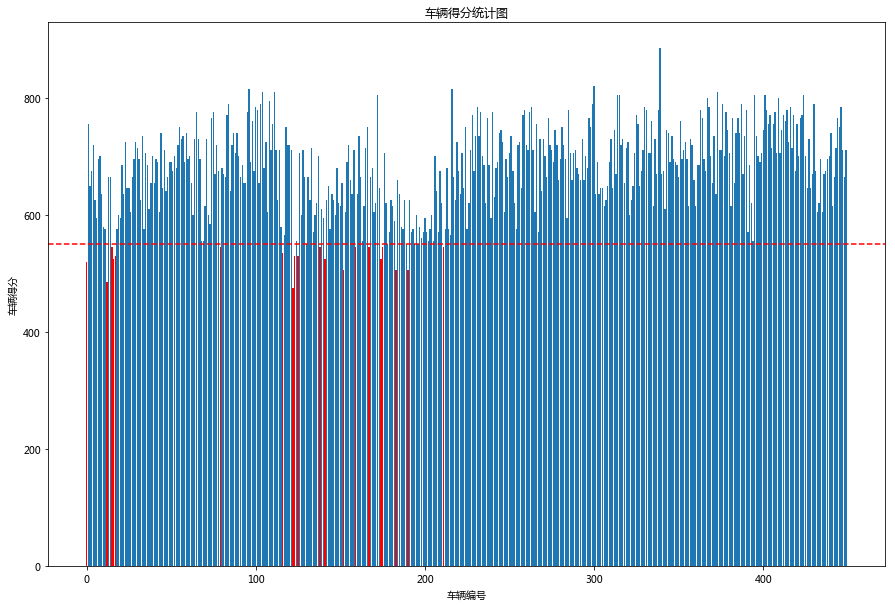

In [107]:
data = pd.read_csv('450 cars evaluation score.csv', encoding='gb2312')
print(data.columns)
plt.figure(figsize = (15,10))
# plt.hist(data['score'] , bins = 20,
#         edgecolor = 'k')

fail_data = data[ data['score'] < 550]


plt.bar(data.index, data['score'])
plt.bar(fail_data.index , fail_data['score'] , color = 'r')
plt.axhline(550,color = 'r', linestyle = "dashed")

plt.xlabel('车辆编号')
plt.ylabel('车辆得分')
plt.title('车辆得分统计图')
plt.savefig('车辆得分统计图')
plt.show()

## 2. 汽车得分直方图

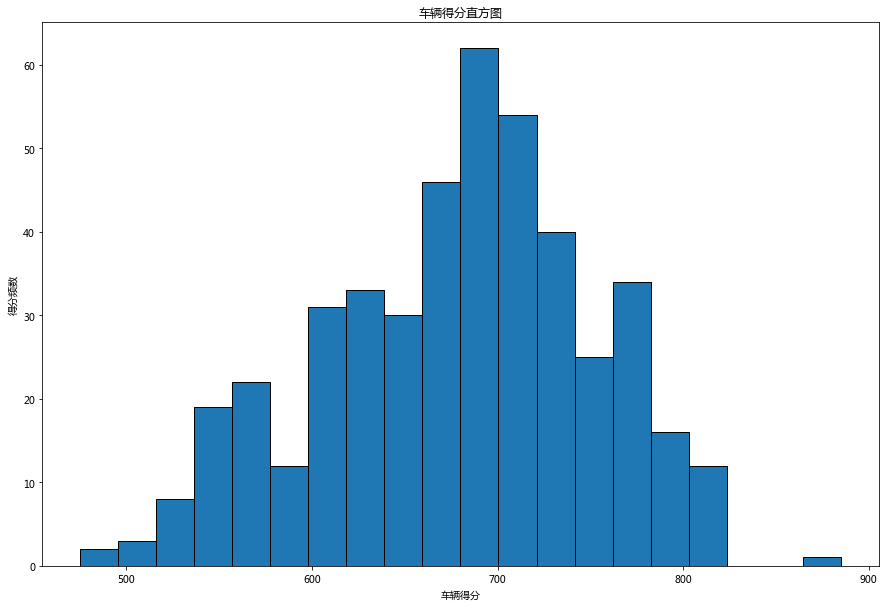

In [108]:
plt.figure(figsize = (15,10))
plt.hist(data['score'] , bins = 20,
        edgecolor = 'k')
plt.xlabel('车辆得分')
plt.ylabel('得分频数')
plt.title('车辆得分直方图')
plt.savefig('车辆得分直方图')
plt.show()

## 3. 汽车 急加速判断可视化

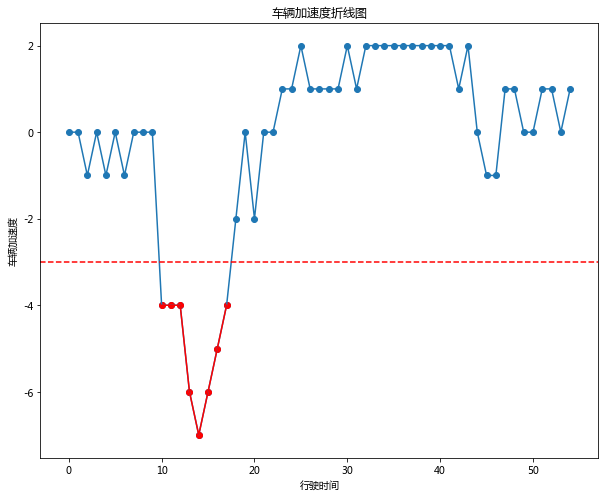

In [127]:
data = pd.read_csv('AA00002_acc.csv')
# print(data)
plt.figure(figsize = (10,8))
# plt.hist(data['score'] , bins = 20,
#         edgecolor = 'k')

fail_data = data[ data['acc_speed'] <= -3]


plt.plot(data.index, data['acc_speed'])
plt.scatter(data.index, data['acc_speed'],marker = 'o')
plt.plot(fail_data.index , fail_data['acc_speed'] , color = 'r')
plt.scatter(fail_data.index , fail_data['acc_speed'] , color = 'r',marker = 'o')
plt.axhline(-3,color = 'r', linestyle = "dashed")

plt.xlabel('行驶时间')
plt.ylabel('车辆加速度')
plt.title('车辆加速度折线图')
plt.savefig('车辆加速度折线图')
plt.show()

## 4. 汽车平均速度行驶

In [171]:
data = pd.read_csv('450 cars evaluation score.csv', encoding='gb2312')
bins = [35,45,60,80,120]
cats = pd.cut(data['平均速度'] , bins = bins )#bins = 5
cats.value_counts()


(45, 60]     173
(35, 45]     140
(60, 80]      74
(80, 120]      3
Name: 平均速度, dtype: int64

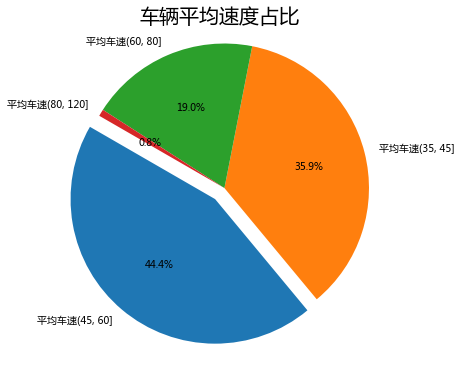

In [178]:
plt.figure(figsize = (6,6))
counts = [173,140,74,3]
labels = ['平均车速(45, 60]' ,'平均车速(35, 45]','平均车速(60, 80]','平均车速(80, 120]']
explode = [0.1 ,0,0,0]
plt.pie(counts,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.axis('equal') 
plt.title("车辆平均速度占比" , fontsize = 20)
plt.savefig('车辆平均速度占比')
plt.show()  

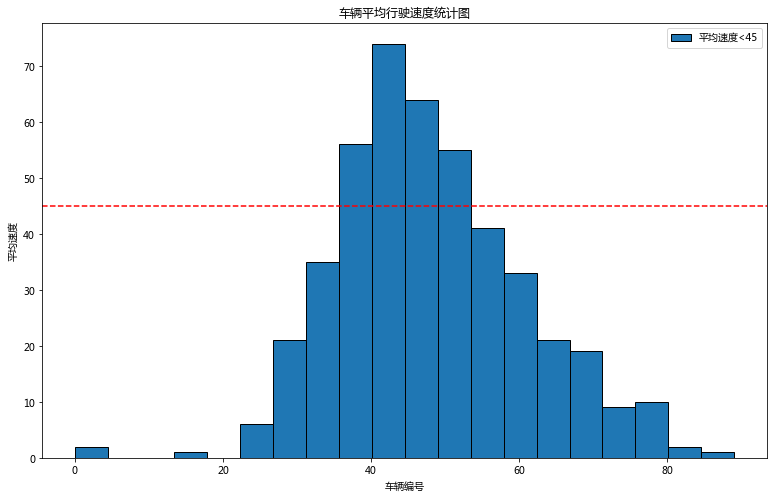

In [157]:
data = pd.read_csv('450 cars evaluation score.csv', encoding='gb2312')

plt.figure(figsize = (13,8))
# plt.hist(data['score'] , bins = 20,
#         edgecolor = 'k')

fail_data = data[ data['平均速度'] >= 45]

# plt.plot(data.index, data['平均速度'])
# # plt.scatter(data.index, data['平均速度'])

# plt.plot(fail_data.index , fail_data['平均速度'] , color = 'r')
# # plt.scatter(fail_data.index , fail_data['平均速度'] , color = 'r')
# plt.bar(data.index, data['平均速度'])
# plt.bar(fail_data.index , fail_data['平均速度'] , color = 'r')
# plt.axhline(45,color = 'r', linestyle = "dashed")


plt.xlabel('车辆编号')
plt.ylabel('平均速度')
plt.title('车辆平均行驶速度统计图')
plt.legend(['平均速度<45','平均速度>=45'])
plt.axhline(45,color = 'r', linestyle = "dashed")
# plt.savefig('车辆平均距离统计图')
plt.show()